In [1]:
import numpy as np
import time_handler_copy as tc
import lsst.sims.seeingModel as sm

In [2]:
timeHandler = tc.TimeHandler('2020-01-03')

In [3]:
seeingSim = sm.SeeingSim(timeHandler)

In [4]:
# We can use SeeingData directly through seeimgSim. 
fwhm500 = seeingSim.seeing_data.fwhm500_at_time(700)
print(fwhm500)

0.85060697794


In [10]:
# And we can use SeeingModel directly through seeingSim.
airmass = np.arange(1.0, 1.5, 0.2)
fwhm_eff, fwhm_geom = seeingSim.seeing_model.seeing_at_airmass(fwhm500, airmass=airmass)
print('\t', airmass)
for i, f in enumerate(seeingSim.filter_list):
    print(f, fwhm_eff[i])

	 [ 1.   1.2  1.4]
u [ 1.19692811  1.33529374  1.4646872 ]
g [ 1.11713169  1.2462728   1.3670399 ]
r [ 1.04964133  1.17098052  1.2844516 ]
i [ 1.00239003  1.11826694  1.22662994]
z [ 0.96979776  1.08190699  1.18674661]
y [ 0.94536973  1.05465505  1.15685389]


In [13]:
# But the point is that seeingSim can do "both at once" for simulations, with all filters and all airmasses.
fwhm500, fwhmgeom, fwhmeff = seeingSim.get_seeing(700, airmass)
print('\t', airmass)
for i, f in enumerate(seeingSim.filter_list):
    print(f, fwhmeff[i])

	 [ 1.   1.2  1.4]
u [ 1.19692811  1.33529374  1.4646872 ]
g [ 1.11713169  1.2462728   1.3670399 ]
r [ 1.04964133  1.17098052  1.2844516 ]
i [ 1.00239003  1.11826694  1.22662994]
z [ 0.96979776  1.08190699  1.18674661]
y [ 0.94536973  1.05465505  1.15685389]


In [14]:
# And to comply with the "old API" you can get a single filter at a time, for a single airmass 
fwhm500, fwhmgeom_g, fwhmeff_g = seeingSim.calculate_seeing(700, 'g', 1.0)
print(fwhm500, fwhmgeom_g, fwhmeff_g)

0.85060697794 0.970282246115 1.11713168627


In [20]:
# Although we're sneaky, because you can also get the seeing in a single filter for multiple airmasses.
fwhm500, fwhmgeom_g, fwhmeff_g = seeingSim.calculate_seeing(700, 'g', airmass)
print(airmass, fwhmeff_g)

[ 1.   1.2  1.4] [ 1.11713169  1.2462728   1.3670399 ]


In [43]:
# But for cool new stuff, get all the filters at once. For either a single or multiple airmasses.
airmass = 1.0
fwhm500, fwhm_geom, fwhm_eff = seeingSim.get_seeing(700, airmass)
print('\t', airmass)
for i, f in enumerate(seeingSim.filter_list):
    print(f, fwhm_eff[i])

	 1.0
u 1.19692810772
g 1.11713168627
r 1.0496413291
i 1.00239003265
z 0.969797761825
y 0.945369726411


In [44]:
# But for cool new stuff, get all the filters at once. For either a single or multiple airmasses.
airmass = np.arange(1.0, 1.5, 0.2)
fwhm500, fwhm_geom, fwhm_eff = seeingSim.get_seeing(700, airmass)
print('\t', airmass)
for i, f in enumerate(seeingSim.filter_list):
    print(f, fwhm_eff[i])

	 [ 1.   1.2  1.4]
u [ 1.19692811  1.33529374  1.4646872 ]
g [ 1.11713169  1.2462728   1.3670399 ]
r [ 1.04964133  1.17098052  1.2844516 ]
i [ 1.00239003  1.11826694  1.22662994]
z [ 0.96979776  1.08190699  1.18674661]
y [ 0.94536973  1.05465505  1.15685389]


In [95]:
%%timeit
times = np.random.rand(1000)*100000
airmass = np.arange(1.0, 1.5, 0.0002)
for t in times:
    fwhm500, fwhmgeom, fwhmeff = seeingSim.get_seeing(t, airmass)

210 ms ± 3.09 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [94]:
print(len(times), len(airmass))

1000 2500


So that was: 
* 26.3ms for 1000 different times, and 3 airmasses, in all filters. 
* 63.2ms for 1000 different times, and 500 airmasses, in all filters.
* 95.6ms for 1000 different times, and 1000 airmasses, in all filters.
* 210ms for 1000 different times, and 2500 airmasses, in all filters.
* 409ms for 1000 different times, and 5000 airmasses, in all filters.
* 652ms for 1000 different times, and 10000 airmasses, in all filters.

* 24.1ms for 500 times, and 250 airmasses, in all filters.
* 45.7ms for 1000 times, and 250 airmasses, in all filters.
* 228ms for 5000 times, and 250 airmasses, in all filters.
* 454ms for 10000 times, and 250 airmasses, in all filters.

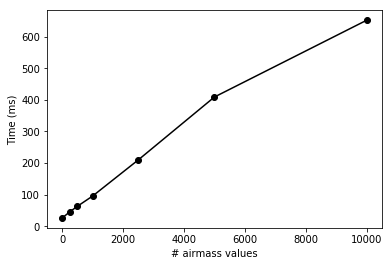

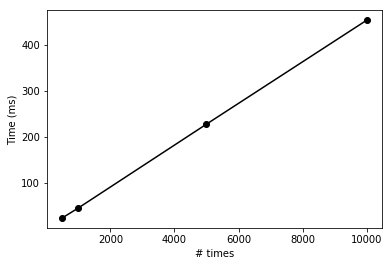

In [96]:
import matplotlib.pyplot as plt
%matplotlib inline
t1 = np.array([26.3, 45.7, 63.2, 95.6, 210, 409, 652], float)
t1_x = np.array([3, 250, 500, 1000, 2500, 5000, 10000])
t2 = np.array([24.1, 45.7, 228, 454], float)
t2_x = np.array([500, 1000, 5000, 10000])
plt.figure()
plt.plot(t1_x, t1, 'k-', marker='o')
plt.xlabel('# airmass values')
plt.ylabel('Time (ms)')
plt.figure()
plt.plot(t2_x, t2, 'k-', marker='o')
plt.xlabel('# times')
plt.ylabel('Time (ms)')
plt.show()

In [99]:
# Estimate of performance for featureScheduler, doing things the simplest way 
# (all pixels = all airmasses .. which we wouldn't necessarily do)
# typical nside = 64
import healpy as hp
npix = hp.nside2npix(64)
print(npix)

49152


In [101]:
%%timeit
airmasses = np.random.rand(npix) + 1.0
t = 12000
fwhm500, fwhmgeom, fwhmeff = seeingSim.get_seeing(t, airmasses)

4.28 ms ± 261 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [110]:
# ~4.28 ms for one time, 49152 airmasses.
# We will ask for *at least* 3M observations, where we'd probably want to update seeing for all maps.
print((4.28 * 3 * 1e6) / 1000 / 3600, 'hrs')
print((4.28 * 800)/1000, 'sec')
# So estimate 3.5 compute hours just checking seeing values for the whole survey, 3.5 seconds per night.

3.566666666666667 hrs
3.424 sec
